In [48]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [49]:
Grandmaster = pd.read_csv('../Dataset/perMinuteDataset/10min/GRANDMASTER.csv')

In [50]:
win_Grandmaster = Grandmaster[['Diff_FirstBLOOD', 'Diff_FirstDRAGON',
       'Diff_FirstHERALD', 'dragonType', 'WIN_controlWARDPlaced', 
       'WIN_Kill_top', 'WIN_Kill_jgl', 'WIN_Kill_mid', 'WIN_Kill_ad', 'WIN_Kill_sup',
       'WIN_Death_top', 'WIN_Death_jgl', 'WIN_Death_mid', 'WIN_Death_ad', 'WIN_Death_sup', 
       'WIN_Asisst_top', 'WIN_Asisst_jgl', 'WIN_Asisst_mid', 'WIN_Asisst_ad', 'WIN_Asisst_sup',
       'WIN_LV_jgl', 'WIN_LV_ad', 'WIN_LV_sup',
       'WIN_CS_top', 'WIN_CS_jgl', 'WIN_CS_mid', 'WIN_CS_ad', 'WIN_CS_sup',
       'WIN_jglCS_jgl',
       'WIN_GOLD_top', 'WIN_GOLD_jgl', 'WIN_GOLD_mid', 'WIN_GOLD_ad', 'WIN_GOLD_sup',
       'WIN_WARDkill', 'WIN_WARDplaced']]
lose_Grandmaster = Grandmaster[['Diff_FirstBLOOD', 'Diff_FirstDRAGON',
       'Diff_FirstHERALD', 'dragonType', 'LOSE_controlWARDPlaced',
       'LOSE_Kill_top', 'LOSE_Kill_jgl', 'LOSE_Kill_mid', 'LOSE_Kill_ad', 'LOSE_Kill_sup',
       'LOSE_Death_top', 'LOSE_Death_jgl', 'LOSE_Death_mid', 'LOSE_Death_ad', 'LOSE_Death_sup',
       'LOSE_Asisst_top', 'LOSE_Asisst_jgl', 'LOSE_Asisst_mid', 'LOSE_Asisst_ad', 'LOSE_Asisst_sup',
       'LOSE_LV_jgl', 'LOSE_LV_ad', 'LOSE_LV_sup',
       'LOSE_CS_top', 'LOSE_CS_jgl', 'LOSE_CS_mid', 'LOSE_CS_ad', 'LOSE_CS_sup',
       'LOSE_jglCS_jgl',
       'LOSE_GOLD_top', 'LOSE_GOLD_jgl', 'LOSE_GOLD_mid', 'LOSE_GOLD_ad', 'LOSE_GOLD_sup',
       'LOSE_WARDkill', 'LOSE_WARDplaced']]
colName = 'WIN'
win_Grandmaster = win_Grandmaster.rename(columns={f'{colName}_controlWARDPlaced': 'controlWARDPlaced',
                                                  f'{colName}_Kill_top': 'Kill_top',f'{colName}_Kill_jgl': 'Kill_jgl',f'{colName}_Kill_mid': 'Kill_mid',f'{colName}_Kill_ad': 'Kill_ad', f'{colName}_Kill_sup': 'Kill_sup',
                                                  f'{colName}_Death_top': 'Death_top',f'{colName}_Death_jgl': 'Death_jgl',f'{colName}_Death_mid': 'Death_mid',f'{colName}_Death_ad': 'Death_ad',f'{colName}_Death_sup': 'Death_sup',
                                                  f'{colName}_Asisst_top': 'Assist_top',f'{colName}_Asisst_jgl': 'Assist_jgl',f'{colName}_Asisst_mid': 'Assist_mid',f'{colName}_Asisst_ad': 'Assist_ad',f'{colName}_Asisst_sup': 'Assist_sup',
                                                  f'{colName}_LV_jgl': 'LV_jgl',f'{colName}_LV_ad': 'LV_ad',f'{colName}_LV_sup': 'LV_sup',
                                                  f'{colName}_CS_top': 'CS_top',f'{colName}_CS_jgl': 'CS_jgl',f'{colName}_CS_mid': 'CS_mid',f'{colName}_CS_ad': 'CS_ad',f'{colName}_CS_sup': 'CS_sup',
                                                  f'{colName}_jglCS_jgl': 'jglCS_jgl',
                                                  f'{colName}_GOLD_top': 'GOLD_top',f'{colName}_GOLD_jgl': 'GOLD_jgl',f'{colName}_GOLD_mid': 'GOLD_mid',f'{colName}_GOLD_ad': 'GOLD_ad',f'{colName}_GOLD_sup': 'GOLD_sup',
                                                  f'{colName}_WARDkill': 'WARDkill',f'{colName}_WARDplaced': 'WARDplaced'})

colName = 'LOSE'
lose_Grandmaster = lose_Grandmaster.rename(columns={f'{colName}_controlWARDPlaced': 'controlWARDPlaced',
                                                  f'{colName}_Kill_top': 'Kill_top',f'{colName}_Kill_jgl': 'Kill_jgl',f'{colName}_Kill_mid': 'Kill_mid',f'{colName}_Kill_ad': 'Kill_ad', f'{colName}_Kill_sup': 'Kill_sup',
                                                  f'{colName}_Death_top': 'Death_top',f'{colName}_Death_jgl': 'Death_jgl',f'{colName}_Death_mid': 'Death_mid',f'{colName}_Death_ad': 'Death_ad',f'{colName}_Death_sup': 'Death_sup',
                                                  f'{colName}_Asisst_top': 'Assist_top',f'{colName}_Asisst_jgl': 'Assist_jgl',f'{colName}_Asisst_mid': 'Assist_mid',f'{colName}_Asisst_ad': 'Assist_ad',f'{colName}_Asisst_sup': 'Assist_sup',
                                                  f'{colName}_LV_jgl': 'LV_jgl',f'{colName}_LV_ad': 'LV_ad',f'{colName}_LV_sup': 'LV_sup',
                                                  f'{colName}_CS_top': 'CS_top',f'{colName}_CS_jgl': 'CS_jgl',f'{colName}_CS_mid': 'CS_mid',f'{colName}_CS_ad': 'CS_ad',f'{colName}_CS_sup': 'CS_sup',
                                                  f'{colName}_jglCS_jgl': 'jglCS_jgl',
                                                  f'{colName}_GOLD_top': 'GOLD_top',f'{colName}_GOLD_jgl': 'GOLD_jgl',f'{colName}_GOLD_mid': 'GOLD_mid',f'{colName}_GOLD_ad': 'GOLD_ad',f'{colName}_GOLD_sup': 'GOLD_sup',
                                                  f'{colName}_WARDkill': 'WARDkill',f'{colName}_WARDplaced': 'WARDplaced'})
# win_Grandmaster['result'] = 1
# lose_Grandmaster['result'] = -1
# data = pd.concat([win_Grandmaster, lose_Grandmaster], axis=0, ignore_index=True)

In [51]:
# 박스플롯
def boxplot_vis(data, target_name):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(data.columns)):
        # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(6, 8, col_idx+1)
        # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
        # 그래프 타이틀: feature name
        plt.title("Feature:" + data.columns[col_idx], fontsize = 20)
    plt.savefig('../figure/boxplot_' + target_name + '.png')
    plt.show()

In [52]:
# 이상치 제거
def remove_outlier(input_data):
    q1 = input_data.quantile(0.25) # 제 1사분위수
    q3 = input_data.quantile(0.75) # 제 3사분위수
    iqr = q3 - q1 # IQR(Interquartile range) 계산
    minimum = q1 - (iqr * 1.5) # IQR 최솟값
    maximum = q3 + (iqr * 1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df_removed_outlier = input_data[(minimum < input_data) & (input_data < maximum)]
    return df_removed_outlier

In [67]:
# boxplot_vis(win_Grandmaster, 'win_Grandmaster')
# boxplot_vis(lose_Grandmaster,'lose_Grandmaster')
win_prep = remove_outlier(win_Grandmaster)
# win_prep.isnull().sum()
# win_prep.dropna(axis = 0, how = 'any', inplace = True)
# print(f"이상치 포함된 승리 데이터 비율: {round((len(win_Grandmaster) - len(win_prep))*100/len(win_Grandmaster), 2)}%")
lose_prep = remove_outlier(lose_Grandmaster)
# lose_prep.isnull().sum()
# lose_prep.dropna(axis = 0, how = 'any', inplace = True)
# print(f"이상치 포함된 패배 데이터 비율: {round((len(lose_Grandmaster) - len(lose_prep))*100/len(lose_Grandmaster), 2)}%")
win_prep['result'] = 1
lose_prep['result'] = 0
data = pd.concat([win_prep, lose_prep], axis=0)
data.result.value_counts(normalize=True)


result
1    0.5
0    0.5
Name: proportion, dtype: float64

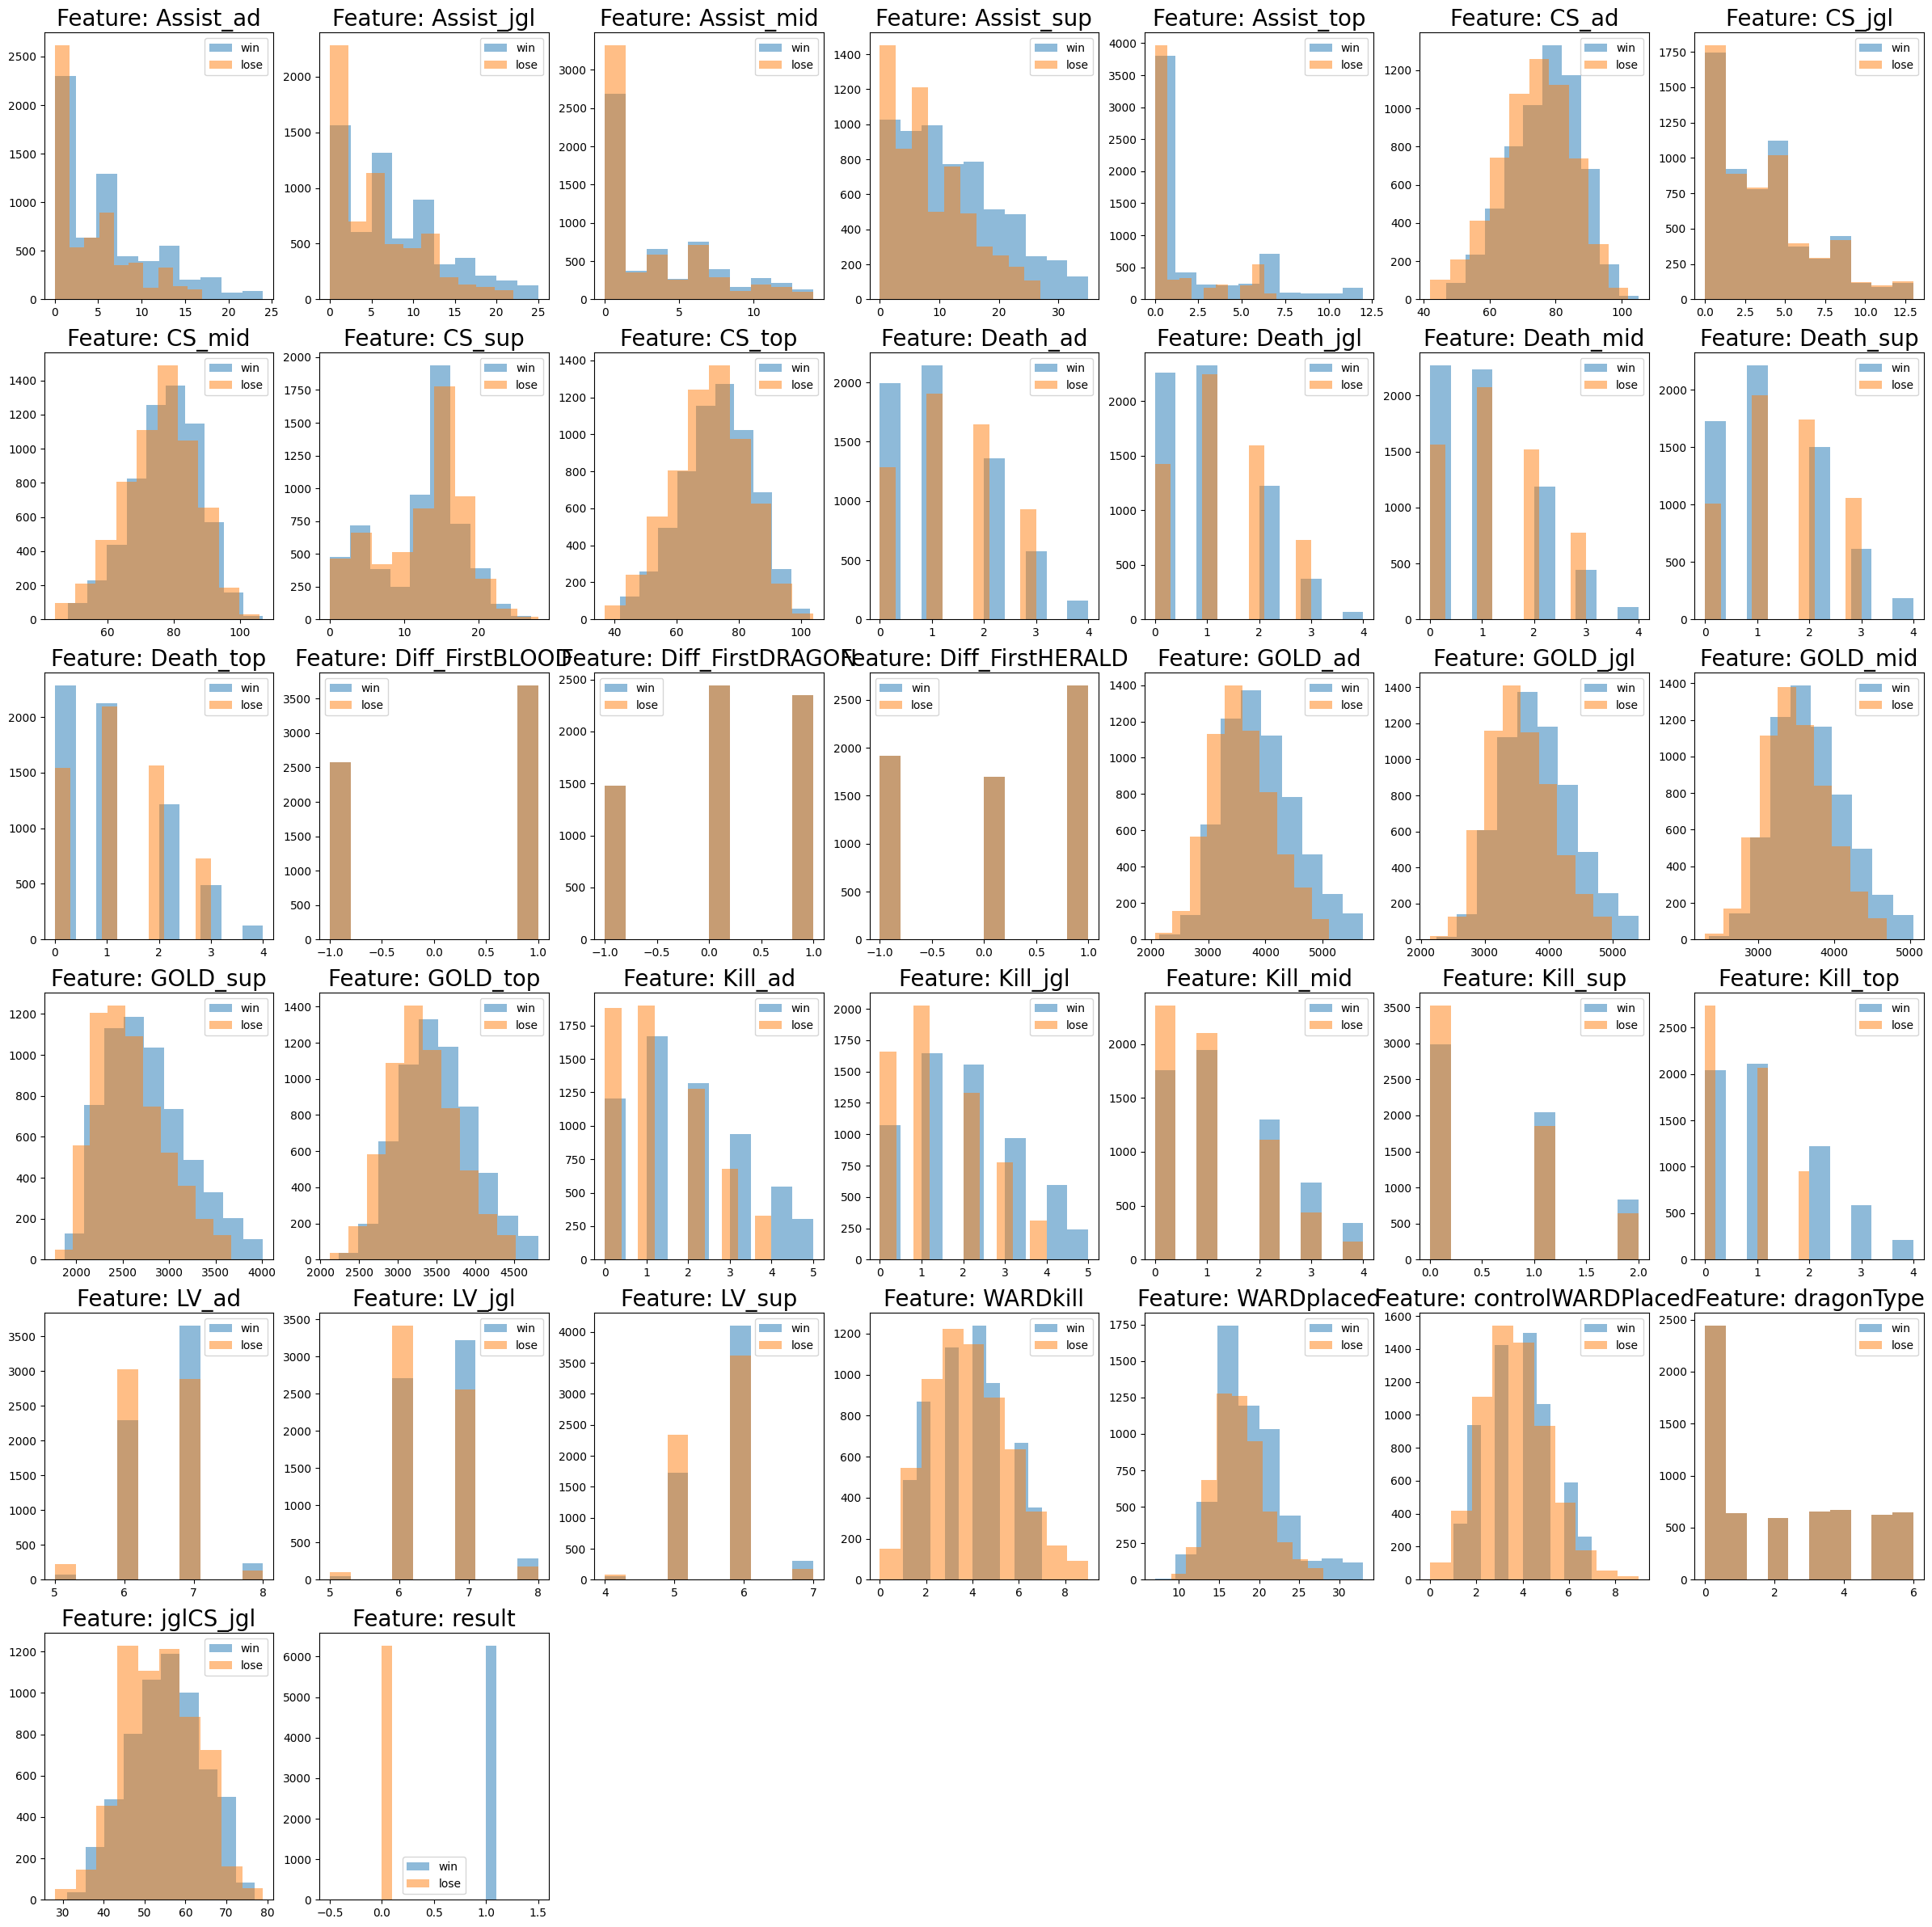

In [68]:
# 설명변수 선정
x = data[data.columns.difference(['target'])]
# 설명변수명 리스트
feature_name = x.columns
plt.figure(figsize=(30, 30))
for col_idx in range(len(feature_name)):
    # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
    plt.subplot(6, 7, col_idx+1)
    # 레드 와인에 해당하는 데이터 histogram 시각화
    plt.hist(data[data["result"] == 1][feature_name[col_idx]], label = "win", alpha = 0.5)
    # 화이트 와인에 해당하는 데이터 histogram 시각화
    plt.hist(data[data["result"] == 0][feature_name[col_idx]], label = "lose", alpha = 0.5)
    plt.legend()
    # 그래프 타이틀: feature name
    plt.title("Feature: "+ feature_name[col_idx], fontsize = 20)
plt.savefig('../figure/relationship.png')
plt.show()

In [69]:
# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()
# 설명변수 및 목표변수 분리
x = data[data.columns.difference(['result'])]
y = data['result']
# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)

# 학습, 테스트 데이터셋 8:2 비율로 분리
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    test_size = 0.2, random_state = 42)

# 훈련 데이터 내 승패 비율
y_train.value_counts(normalize=True)

# 테스트 데이터 내 승패 비율
y_test.value_counts(normalize=True)

result
1    0.507379
0    0.492621
Name: proportion, dtype: float64

In [65]:
# 기본 모델링 함수
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=42)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

In [57]:
# 하이퍼파라미터별 모델 성능 시각화
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('../figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

In [58]:
# 모델 최적화 함수: 학습할 트리 모델 개수 선정
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=42)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [59]:
# 모델 최적화 함수: 최대 깊이 선정
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=42)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=42)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [60]:
# 모델 최적화 함수: 분리 노드의 최소 자료 수 선정
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 42)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 42)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

In [61]:
# 모델 최적화 함수: 잎사귀 노드의 최소 자료 수 선정
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=42)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=42)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

In [62]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=42, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 42, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
    model_path = '../model/'
    model_filename = 'wine_classification_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    ConfusionMatrixDisplay(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['lose', 'win'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.savefig('../figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    plt.savefig('../figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

In [63]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

In [72]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values